Text(0, 0.5, 'Layer number (n)')

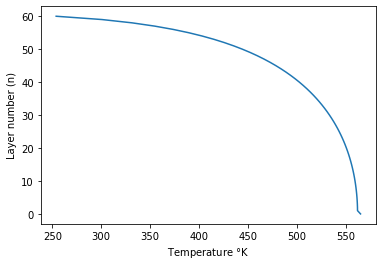

In [8]:
"""THIS NEEDS A GUI"""



import numpy as np
import matplotlib.pyplot as plt
# Import radiative transfer utils box
import utils


# How many layers of our N-layer atmosphere? 
N = 60
# Surface albedo
alpha = 0.3

# Solar Constant
S0 = 1368 #W/m^2
total_vertical_heat_flux = 110 # W/m^2

# Create some random emissivities to use
emmisivities = np.arange(0, N+1, 1)/(N+1)
emmisivities[0] = 1

# Now get our emissivity Matrix
R_up_matrix = utils.R_up_matrix(N, emmisivities)
total_emissivity_matrix = utils.emissivity_matrix(R_up_matrix, emmisivities)
#print('Emissivity Matrix:')
#print(total_emissivity_matrix)

# We also need our forcings vector
insolation = (S0/4)*(1 - alpha)
heat_flux_profile = utils.vertical_heat_flux_profile(N, total_vertical_heat_flux)
forcings = utils.forcings_vector(N, insolation, heat_flux_profile)
#print('\nForcings Vector: ')
#print(forcings)

# Now find the temperature vector using the emissivity matrix and the forcings
temperature_vector = utils.temperature(total_emissivity_matrix, forcings)

plt.plot(temperature_vector, range(0,N+1))
plt.xlabel('Temperature $\degree$K')
plt.ylabel('Layer number (n)')
